In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Loading and Preprocessing

In [3]:
data = load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
x=pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
y = pd.DataFrame(data.target,columns=['target'])

In [7]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [9]:
df=pd.concat([x,y],axis=1)

In [10]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [11]:
duplicates=x.duplicated().sum()

In [12]:
duplicates

np.int64(0)

In [13]:
# Remove outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Dataset shape after preprocessing:", df.shape)

Dataset shape after preprocessing: (398, 31)


In [14]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,0
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,0
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242,1
555,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283,1
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321,1


In [54]:
correlation_matrix=df.corr()

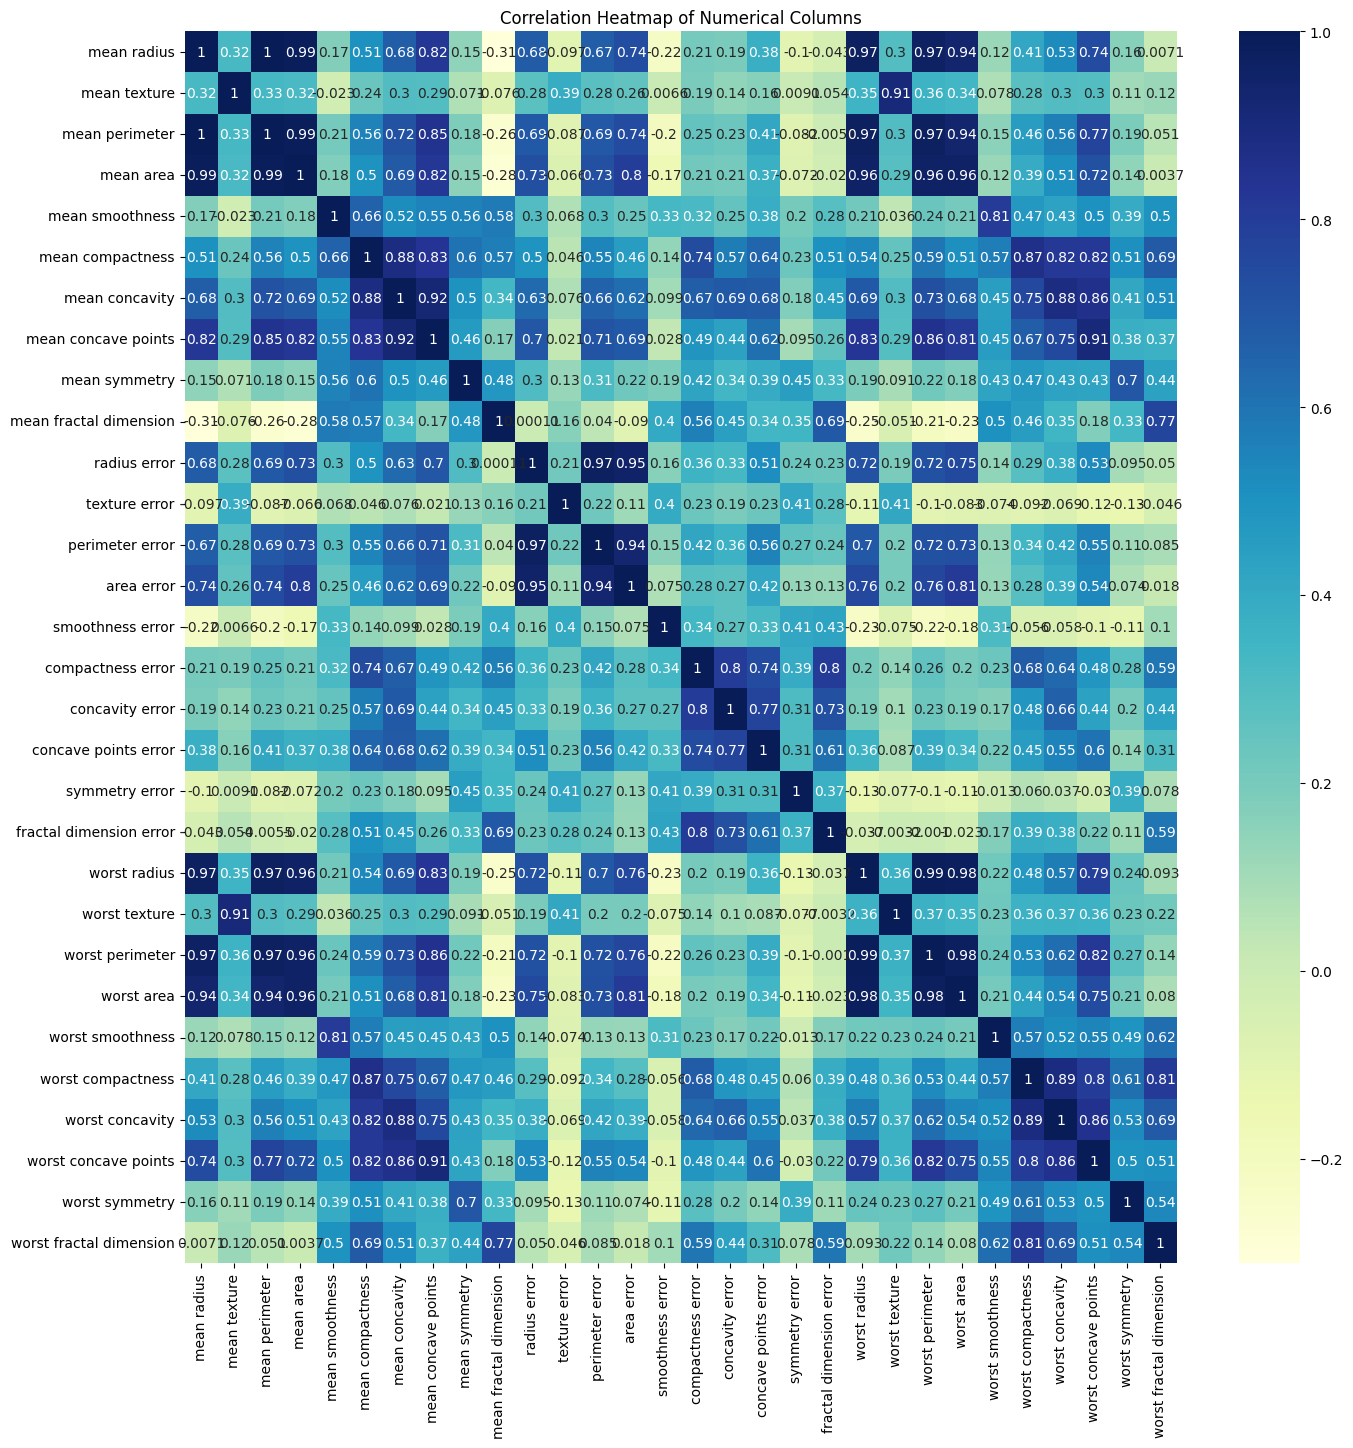

In [55]:
#Heatmap
plt.figure(figsize=(16, 16))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

Classification Algorithm Implementation

Logistic Regression

In [17]:
x_1=df.drop(columns=['target'])

In [18]:
y_1=df['target']

In [19]:
X_train, X_test, y_train, y_test=train_test_split(x_1, y_1, test_size=0.2, random_state=40)

In [20]:
feature_names = data.feature_names

In [21]:
# Feature Selection using SelectKBest
def perform_feature_selection(X_train, X_test, y_train, k=10):
    # Initialize SelectKBest with f_classif scoring function
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    
    # Fit and transform the training data
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    # Transform the test data
    X_test_selected = selector.transform(X_test)
    
    # Get selected feature names
    selected_features_mask = selector.get_support()
    selected_features = feature_names[selected_features_mask]
    
    # Get feature scores
    feature_scores = pd.DataFrame({
        'Feature': feature_names,
        'Score': selector.scores_
    })
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    
    return X_train_selected, X_test_selected, selected_features, feature_scores

In [22]:
# Perform feature selection
k_features = 10
X_train_selected, X_test_selected, selected_features, feature_scores = perform_feature_selection(
    X_train, X_test, y_train, k=k_features
)

In [23]:
print("\nTop 10 Selected Features:")
print("-" * 50)
for i, feature in enumerate(selected_features, 1):
    score = feature_scores[feature_scores['Feature'] == feature]['Score'].values[0]
    print(f"{i}. {feature}: {score:.2f}")


Top 10 Selected Features:
--------------------------------------------------
1. mean radius: 0.26
2. mean perimeter: 0.29
3. mean concavity: 0.31
4. mean concave points: 0.36
5. area error: 0.27
6. worst radius: 0.37
7. worst perimeter: 0.37
8. worst area: 0.38
9. worst concavity: 0.29
10. worst concave points: 0.34


In [24]:
#sacling using standard scalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [25]:
model_LR=LogisticRegression()
model_LR.fit(X_train_scaled,y_train)

LogisticRegression()

In [26]:
ypred_LR=model_LR.predict(X_test_scaled)

In [27]:
accuracy_LR=accuracy_score(y_test,ypred_LR)
accuracy_LR

0.925

In [28]:
print("\nClassification Report:")
print(classification_report(y_test, ypred_LR))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.94      0.97      0.95        63

    accuracy                           0.93        80
   macro avg       0.90      0.87      0.88        80
weighted avg       0.92      0.93      0.92        80



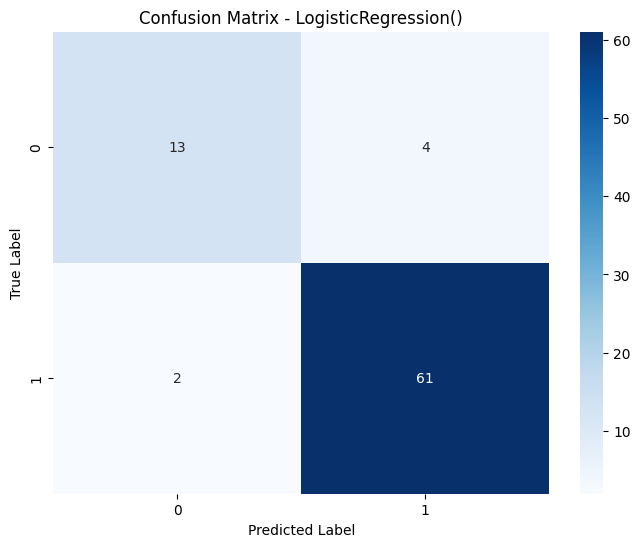

In [29]:
# Plot confusion matrix
cm = confusion_matrix(y_test, ypred_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_LR}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [31]:
DT=DecisionTreeClassifier(max_depth=4, random_state=42)
DT.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [32]:
y_pred_DT=DT.predict(X_test_scaled)

In [33]:
accuracy_DT=accuracy_score(y_test, y_pred_DT)
accuracy_DT

0.925

In [34]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_DT))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.93      0.98      0.95        63

    accuracy                           0.93        80
   macro avg       0.92      0.85      0.88        80
weighted avg       0.92      0.93      0.92        80



[[12  5]
 [ 1 62]]


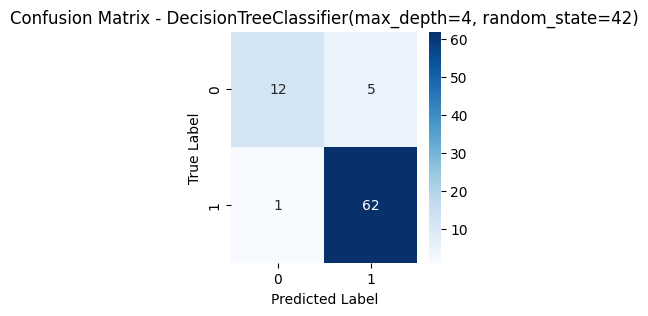

In [35]:
cm = confusion_matrix(y_test, y_pred_DT)
print(cm)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {DT}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

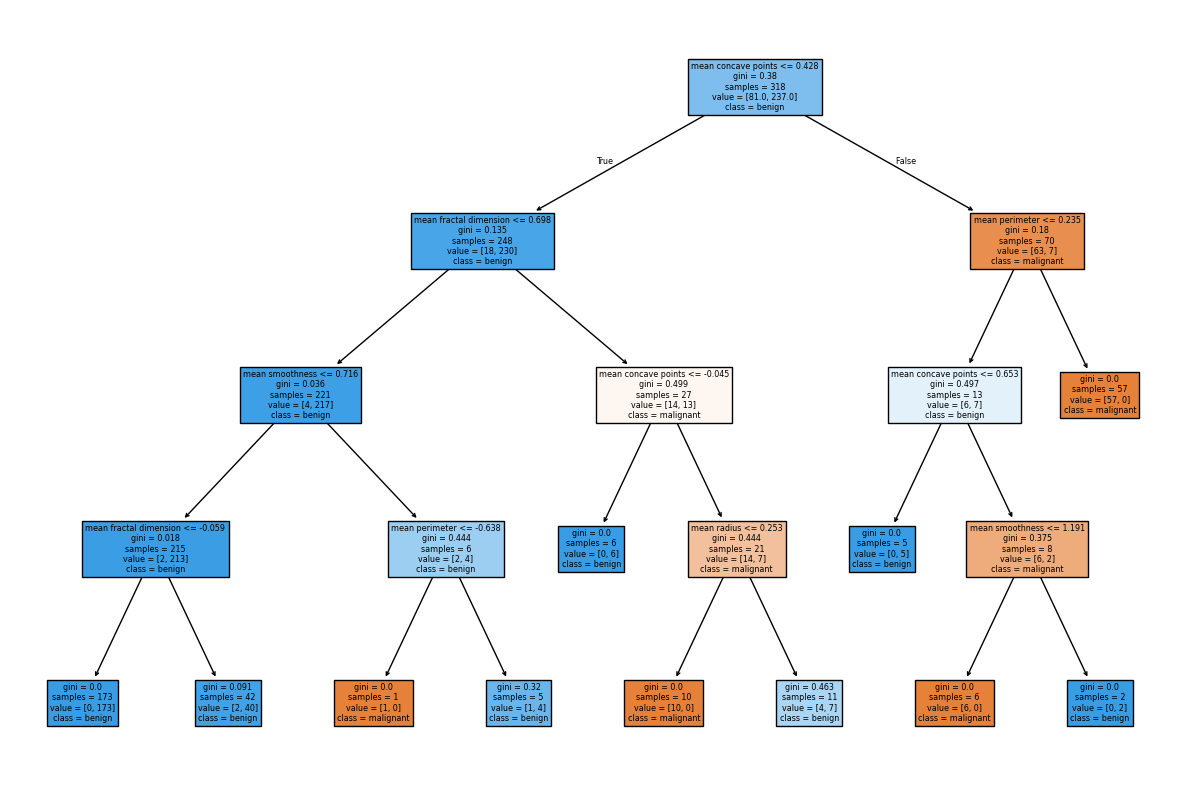

In [36]:
plt.figure(figsize=(15, 10))
plot_tree(DT, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

Random Forest Classifier

In [37]:
rf = RandomForestClassifier(n_estimators=100,
                           max_depth=10,
                           random_state=42)

In [38]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [39]:
y_pred_rf=rf.predict(X_test_scaled)

In [40]:
accuracy=accuracy_score(y_test,y_pred_rf)

In [41]:
accuracy

0.9125

In [42]:
print("Random_forest classification report:")
print(classification_report(y_test,y_pred_rf))

Random_forest classification report:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.91      0.98      0.95        63

    accuracy                           0.91        80
   macro avg       0.91      0.82      0.85        80
weighted avg       0.91      0.91      0.91        80



Support Vector Machine (SVM)

In [43]:
from sklearn.svm import SVC

In [44]:
svm_clf = SVC(kernel='linear', random_state=42)

In [45]:
svm_clf.fit(X_train_scaled, y_train)
y_pred_svc= svm_clf.predict(X_test_scaled)

In [46]:
accuracy=accuracy_score(y_test,y_pred_svc)

In [47]:
accuracy

0.925

[[13  4]
 [ 2 61]]


Text(0.5, 3.722222222222216, 'Predicted Label')

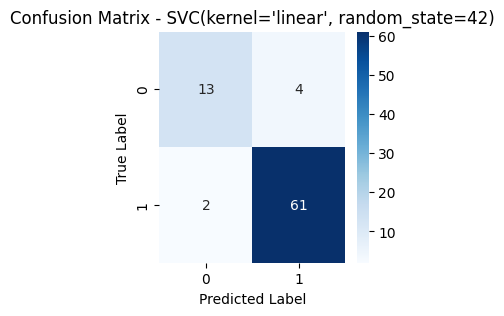

In [48]:
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {svm_clf}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

k-Nearest Neighbors (k-NN)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
k = 5  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [51]:
accuracy=accuracy_score(y_test,y_pred_knn)

In [52]:
accuracy

0.925

[[13  4]
 [ 2 61]]


Text(0.5, 3.722222222222216, 'Predicted Label')

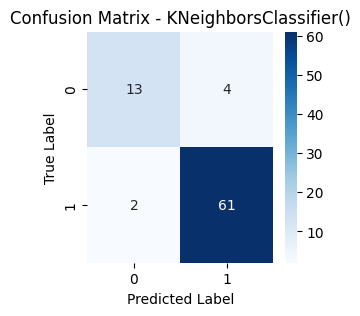

In [53]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {knn}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')